In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib as mpl

import raddetect as rd

In [2]:
from scipy.stats import crystalball
from scipy.stats import norm

In [7]:
# It works only in the MPIK network
monalpha = rd.MonalphaAnalysis(file_path='/Users/developer/Desktop/Rn_Analysis/detectors/Mona/Ti#04/mn27052024.root')

Retrieving data from /Users/developer/Desktop/Rn_Analysis/detectors/Mona/Ti#04/mn27052024.root


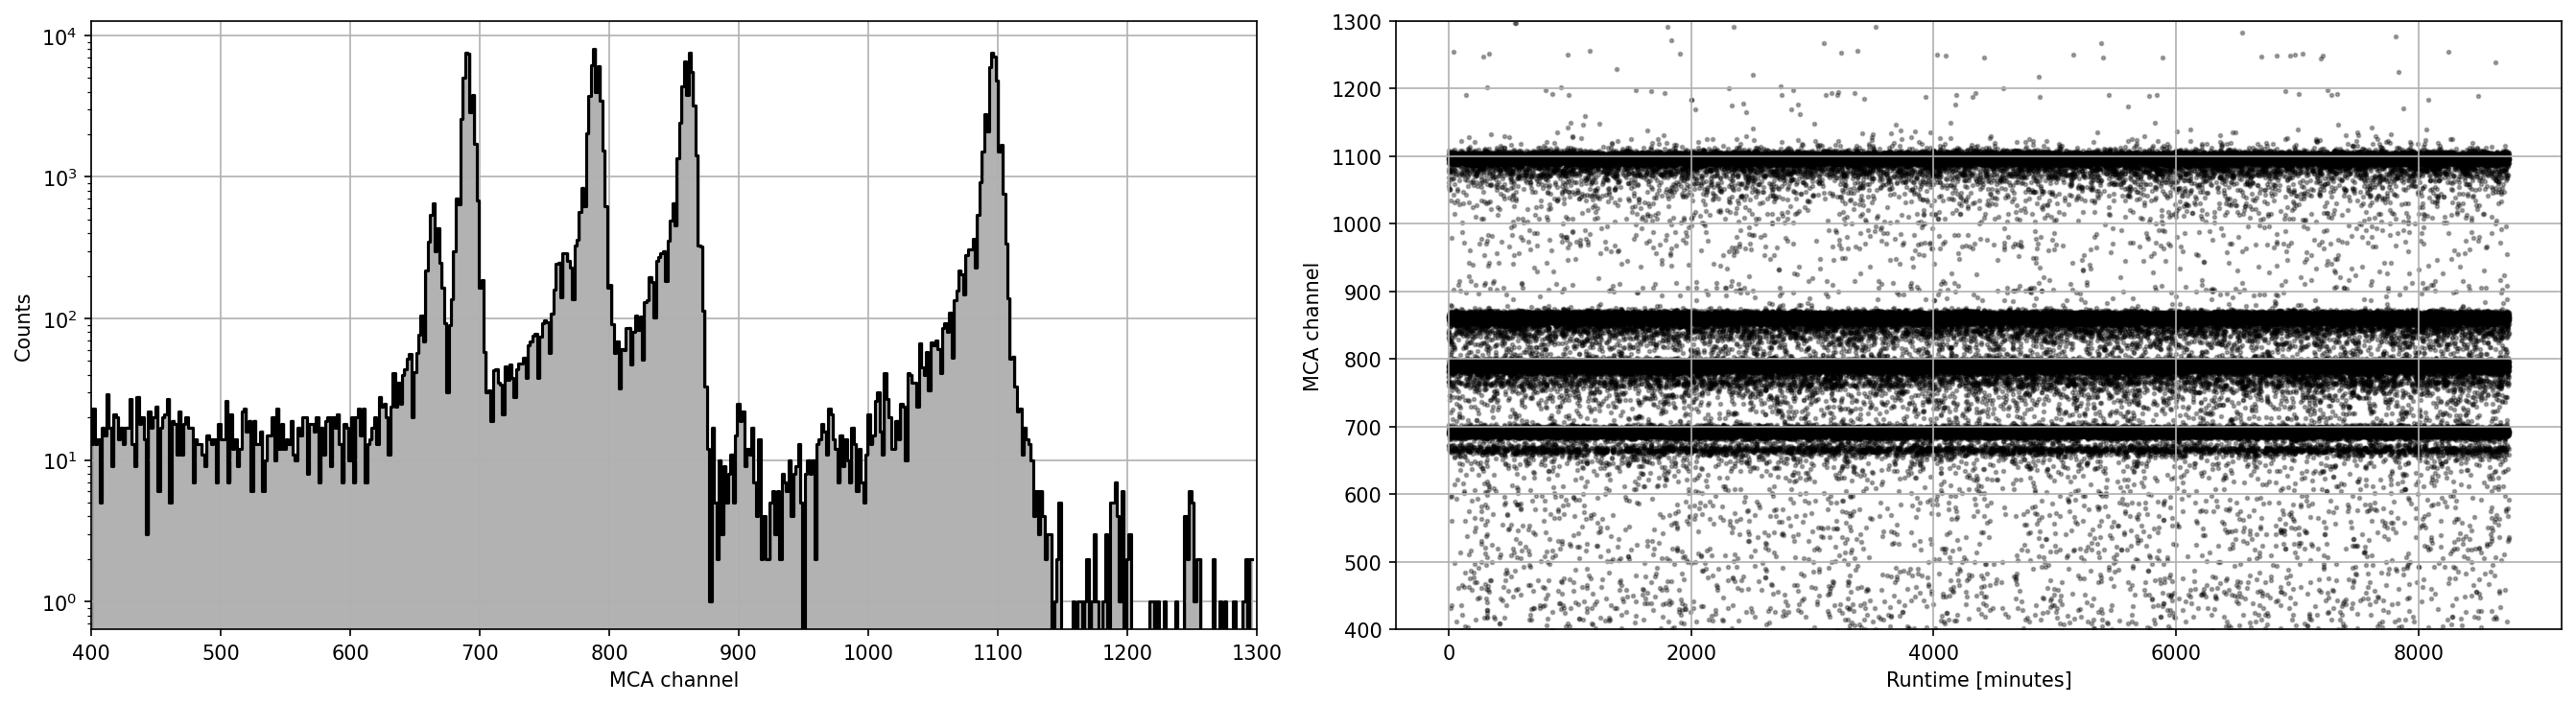

In [8]:
monalpha.get_base_plot(n_channels=500, n_timestamp=200)

In [9]:
def Model(
    x, 
    beta1, m1, loc1, scale1, 
    # A1_1, 
    A1_2,
    beta2, m2, loc2, scale2, 
    # A2_1, 
    A2_2,
    # a, b
    ):
    # _gauss_1 = A1_1 * sp.stats.norm.pdf(x, loc=loc1, scale=scale1)
    _crystalball_1 = A1_2 * sp.stats.crystalball.pdf(x, beta1, m1, loc=loc1, scale=scale1)
    
    # _gauss_2 = A2_1 * sp.stats.norm.pdf(x, loc=loc1, scale=scale1)
    _crystalball_2 = A2_2 * sp.stats.crystalball.pdf(x, beta2, m2, loc=loc2, scale=scale2)
    
    # _linear = a * x + b
    
    return _crystalball_1 + _crystalball_2

init = {
    'beta1': 1, 'm1': 4, 'loc1': 665, 'scale1': 3, 
    # 'A1_1': 94.8e3 / 2, 
    'A1_2': 500,
    'beta2': 1, 'm2': 4, 'loc2': 692, 'scale2': 3, 
    # 'A2_1': 101.2e3 / 2, 
    'A2_2': 3500,
    # 'a': 0, # -0.0135, 
    # 'b': 0, # 9
}

fixed = {
    'beta1': False, 'm1': False, 'loc1': False, 'scale1': False, 
    # 'A1_1': False, 
    'A1_2': False,
    'beta2': False, 'm2': False, 'loc2': False, 'scale2': False, 
    # 'A2_1': False, 
    'A2_2': False,
    # 'a': True, 'b': True
    
}

_MCA_range = [600, 705]
_MCA_counts_limit = 1
m = monalpha.get_mca_spectrum_fitting_object(model=Model, init=init, MCA_range=_MCA_range, MCA_counts_limit=_MCA_counts_limit, fixed=fixed)
m.migrad()
m.minos()
m.hesse()

RuntimeError: Function minimum is not valid: <FMin algorithm='Migrad' edm=nan edm_goal=0.0002 errordef=1.0 fval=nan has_accurate_covar=True has_covariance=True has_made_posdef_covar=False has_parameters_at_limit=False has_posdef_covar=True has_reached_call_limit=False has_valid_parameters=False hesse_failed=False is_above_max_edm=True is_valid=False nfcn=846 ngrad=0 reduced_chi2=nan time=0.2207129710004665>